# Analisis de Rendimiento
By Jean Carlo Alvarez Ramirez

# Análisis Exploratorio y Limpieza de Datos
Se realizó un análisis descriptivo para identificar valores atípicos, incoherentes o faltantes. A continuación, se muestra un fragmento del proceso de limpieza y análisis utilizando pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset_deportivo.csv')

In [ ]:
# Estadísticas descriptivas
print(df.describe())

             Edad  HorasEntrenamiento  Experiencia    Lesiones  Rendimiento
count  500.000000          500.000000    500.00000  500.000000   500.000000
mean    25.754000           12.246200      7.79800    0.990000     4.859700
std      5.089724            4.296026      4.12738    0.965279     2.718258
min     18.000000            5.100000      1.00000    0.000000    -1.640000
25%     21.000000            8.400000      4.00000    0.000000     2.977500
50%     25.000000           12.100000      8.00000    1.000000     4.830000
75%     30.000000           15.925000     11.00000    2.000000     6.890000
max     34.000000           20.000000     14.00000    4.000000    11.310000


In [ ]:
# Revisión de valores nulos
print(df.isnull().sum())

Edad                  0
HorasEntrenamiento    0
Experiencia           0
Lesiones              0
Rendimiento           0
dtype: int64


In [ ]:
# Identificación y eliminación de outliers en 'Lesiones'
# Se consideran atípicos aquellos registros con lesiones mayores a 5
df = df[df['Lesiones'] <= 5]

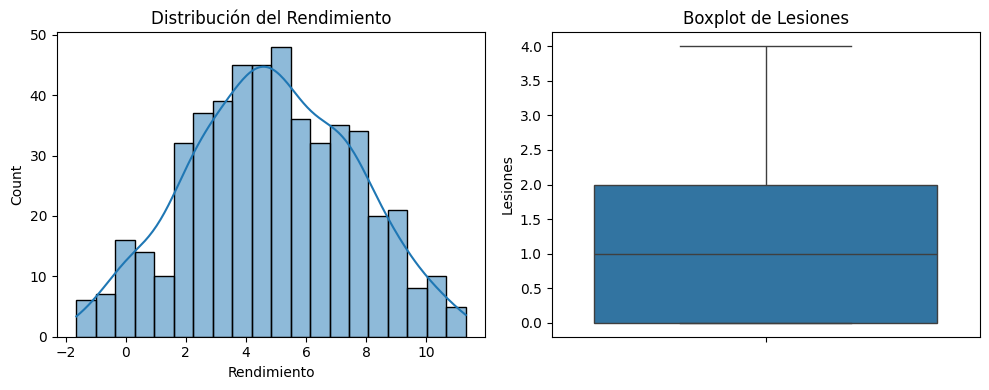

In [ ]:
# Visualización de la distribución de variables clave
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Rendimiento'], bins=20, kde=True)
plt.title('Distribución del Rendimiento')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Lesiones'])
plt.title('Boxplot de Lesiones')
plt.tight_layout()
plt.show()

El análisis confirmó la consistencia de la mayoría de los registros, eliminándose aquellos con valores extremos en la variable de lesiones

# Desarrollo del Modelo Predictivo

Selección del Modelo
Se optó por un modelo de regresión lineal múltiple para predecir el rendimiento de los deportistas en función de las variables: Edad, HorasEntrenamiento, Experiencia y Lesiones. Esta elección se fundamenta en:

Relación Lineal: Se asume una relación lineal entre las variables predictoras y el rendimiento.
Interpretabilidad: El modelo permite evaluar el impacto de cada variable en el rendimiento.
Simplicidad y Eficiencia: Es adecuado para datasets de tamaño moderado y facilita el análisis de las contribuciones individuales

# Implementación del Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Definición de variables predictoras (X) y variable objetivo (y)
X = df[['Edad', 'HorasEntrenamiento', 'Experiencia', 'Lesiones']]
y = df['Rendimiento']

In [ ]:
# División del dataset en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenamiento del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicción sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del Modelo
Para evaluar la precisión del modelo se utilizaron las métricas RMSE (Raíz del Error Cuadrático Medio) y MAE (Error Absoluto Medio):

In [ ]:
# Cálculo de las métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 1.05
MAE: 0.83


# Visualización de Resultados
Se generó un gráfico de dispersión que compara el rendimiento real con el predicho

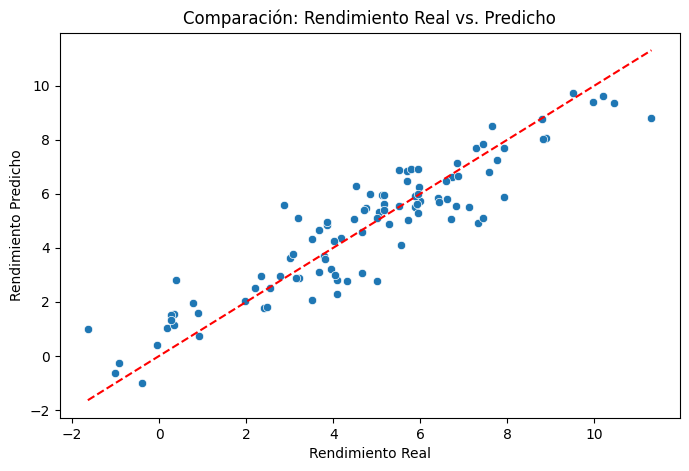

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Rendimiento Real')
plt.ylabel('Rendimiento Predicho')
plt.title('Comparación: Rendimiento Real vs. Predicho')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.show()

La gráfica muestra una tendencia alineada, lo que indica que el modelo tiene una capacidad predictiva razonable. No obstante, se van a realizar ajustes y evaluar modelos alternativos para ver si el analisis y el modelo mejora